<a href="https://colab.research.google.com/github/acecoder7/Accident-Detection-Model/blob/main/Accident_detection_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from time import perf_counter 
import os
import cv2

In [ ]:
os.environ['KAGGLE_USERNAME']="alkadeep"
os.environ['KAGGLE_KEY']="bdf093bbaf48eb9c99cb787a72e46d7e"

In [ ]:
!kaggle datasets download -d ckay16/accident-detection-from-cctv-footage

 95% 237M/249M [00:02<00:00, 98.1MB/s]
100% 249M/249M [00:02<00:00, 95.4MB/s]


In [ ]:
!unzip accident-detection-from-cctv-footage.zip

Archive:  accident-detection-from-cctv-footage.zip
  inflating: data/test/Accident/acc1 (7).jpg  
  inflating: data/test/Accident/test10_33.jpg  
  inflating: data/test/Accident/test10_56.jpg  
  inflating: data/test/Accident/test10_61.jpg  
  inflating: data/test/Accident/test12_13.jpg  
  inflating: data/test/Accident/test12_16.jpg  
  inflating: data/test/Accident/test13_22.jpg  
  inflating: data/test/Accident/test15_15.jpg  
  inflating: data/test/Accident/test18_22.jpg  
  inflating: data/test/Accident/test18_24.jpg  
  inflating: data/test/Accident/test19_26.jpg  
  inflating: data/test/Accident/test1_18.jpg  
  inflating: data/test/Accident/test1_20.jpg  
  inflating: data/test/Accident/test1_24.jpg  
  inflating: data/test/Accident/test1_26.jpg  
  inflating: data/test/Accident/test1_27.jpg  
  inflating: data/test/Accident/test21_10.jpg  
  inflating: data/test/Accident/test21_14.jpg  
  inflating: data/test/Accident/test21_18.jpg  
  inflating: data/test/Accident/test21_20.j

In [ ]:
batch_size = 120
img_height = 250
img_width = 250

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.


In [ ]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 98 files belonging to 2 classes.


In [ ]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 100 files belonging to 2 classes.


In [ ]:
class_names = training_ds.class_names
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model= Sequential([
                   Conv2D(32, 3, input_shape=(250,250,3), activation='relu'),
                   MaxPooling2D(),
                   Conv2D(16, 3, activation='relu',),
                   MaxPooling2D(),
                   Conv2D(16, 3, activation='relu'),
                   MaxPooling2D(),
                   Flatten(),
                   Dense(128, activation='relu'),
                   Dense(64, activation='relu'),
                   Dense(1, activation='sigmoid')                
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 122, 122, 16)      4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 59, 59, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 29, 29, 16)      

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(training_ds, validation_data=validation_ds, epochs=15)

Epoch 1/15
7/7 [==============================] - 7s 328ms/step - loss: 0.8946 - accuracy: 0.7206 - val_loss: 0.5032 - val_accuracy: 0.7551
Epoch 2/15
7/7 [==============================] - 5s 230ms/step - loss: 0.3622 - accuracy: 0.8584 - val_loss: 0.2972 - val_accuracy: 0.8776
Epoch 3/15
7/7 [==============================] - 5s 248ms/step - loss: 0.2727 - accuracy: 0.8951 - val_loss: 0.3275 - val_accuracy: 0.8061
Epoch 4/15
7/7 [==============================] - 7s 344ms/step - loss: 0.1768 - accuracy: 0.9355 - val_loss: 0.2432 - val_accuracy: 0.8980
Epoch 5/15
7/7 [==============================] - 7s 342ms/step - loss: 0.1258 - accuracy: 0.9482 - val_loss: 0.2717 - val_accuracy: 0.8980
Epoch 6/15
7/7 [==============================] - 7s 309ms/step - loss: 0.0968 - accuracy: 0.9659 - val_loss: 0.3210 - val_accuracy: 0.8878
Epoch 7/15
7/7 [==============================] - 6s 276ms/step - loss: 0.0664 - accuracy: 0.9798 - val_loss: 0.2480 - val_accuracy: 0.9184
Epoch 8/15
7/7 [====

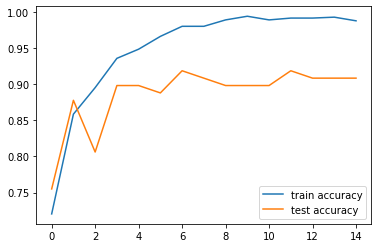

In [ ]:
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

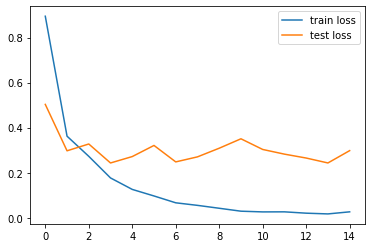

In [ ]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

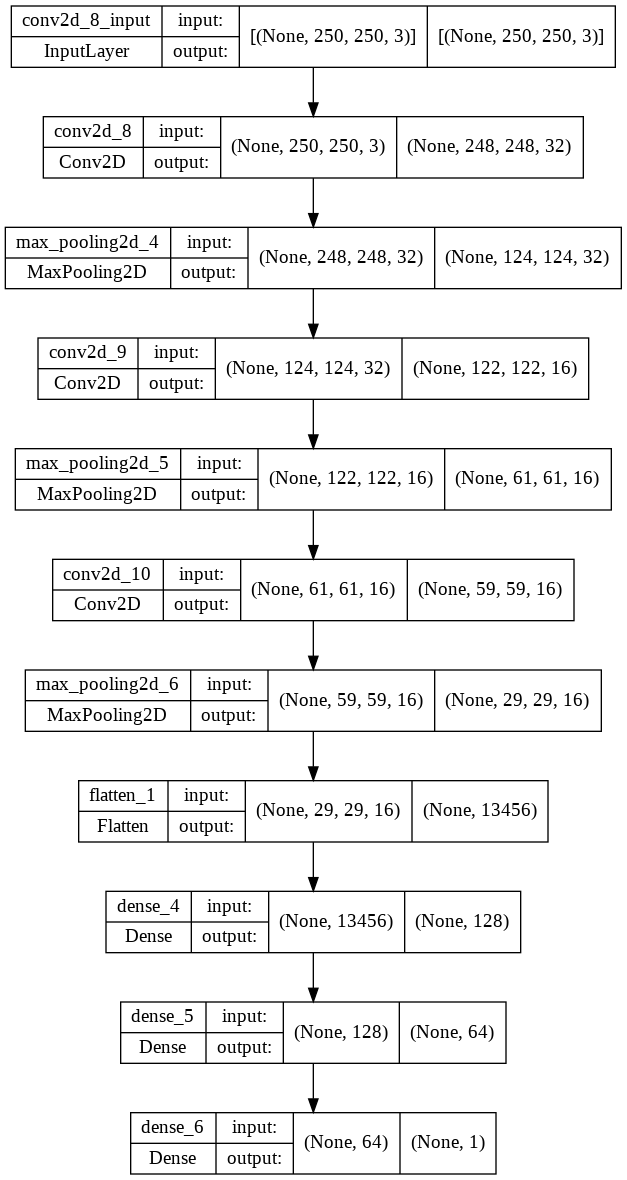

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model2= Sequential([
                   Conv2D(32, 3, input_shape=(250,250,3), activation='relu'),
                   MaxPooling2D(),
                   Conv2D(16, 3, activation='relu',),
                   MaxPooling2D(),
                   Conv2D(16, 3, activation='relu'),
                   MaxPooling2D(),
                   Flatten(),
                   Dense(128, activation='relu'),
                   Dense(64, activation='relu'),
                   Dense(1, activation='sigmoid')                
])

In [ ]:
model2.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('model_checkpoints.h5', save_best_only=True, verbose=1)
callbacks=[tf.keras.callbacks.EarlyStopping(patience=4), tf.keras.callbacks.TensorBoard(log_dir='Logs')]

In [ ]:
model2.fit(training_ds, validation_data=validation_ds, epochs=20)

Epoch 1/20
7/7 [==============================] - 6s 252ms/step - loss: 0.1359 - accuracy: 0.9545 - val_loss: 0.2169 - val_accuracy: 0.9184
Epoch 2/20
7/7 [==============================] - 5s 272ms/step - loss: 0.0940 - accuracy: 0.9646 - val_loss: 0.2778 - val_accuracy: 0.9490
Epoch 3/20
7/7 [==============================] - 6s 230ms/step - loss: 0.0769 - accuracy: 0.9709 - val_loss: 0.2063 - val_accuracy: 0.9184
Epoch 4/20
7/7 [==============================] - 5s 233ms/step - loss: 0.0964 - accuracy: 0.9735 - val_loss: 0.2447 - val_accuracy: 0.8878
Epoch 5/20
7/7 [==============================] - 6s 244ms/step - loss: 0.0851 - accuracy: 0.9760 - val_loss: 0.2973 - val_accuracy: 0.9082
Epoch 6/20
7/7 [==============================] - 6s 243ms/step - loss: 0.0524 - accuracy: 0.9760 - val_loss: 0.3293 - val_accuracy: 0.8878
Epoch 7/20
7/7 [==============================] - 5s 245ms/step - loss: 0.0560 - accuracy: 0.9785 - val_loss: 0.2067 - val_accuracy: 0.9388
Epoch 8/20
7/7 [====

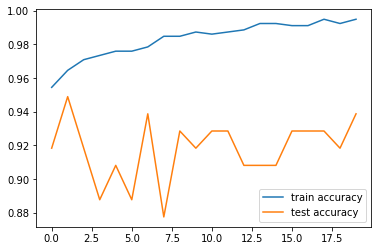

In [ ]:
plt.plot(model2.history.history['accuracy'], label='train accuracy')
plt.plot(model2.history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

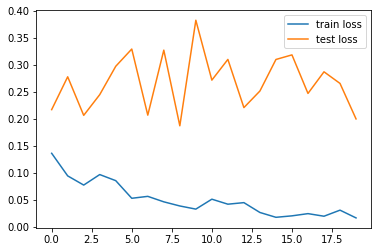

In [ ]:
plt.plot(model2.history.history['loss'], label='train loss')
plt.plot(model2.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()